## 1. Introdução

A análise abaixo foi feita utilizando dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa tem alguns recursos de áudio associados a ela, que está disponível no site [Kangle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv).

A motivação do estudo parte de entender como essas variáveis afetam no popularidade das musícas. Mostrando-se relevante, por permitir enteder o gosto dos usuários e possibilitar a construção de um sistema de recomendação para os usuários do Spotify, com base nas suas entradas.

Algumas hipóteses foram feitas, com o intuito de guiar a análise dos dados

**Hipóteses iniciais quanto a base utilizada:**
1. Qual a relação das variáveis com o nível de popularidade da faixa?
2. Faixas gravadas ao vivo são mais dançantes?
3. As faixas com letras explícitas tendem a ser mais populares?

### 1.1 Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')

### 1.2 Carregando o Dataset

In [ ]:
# importando o arquivo de músicas
df = pd.read_csv('/content/dataset.csv', low_memory = False)
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


Descrição dos dados das colunas, pode ser melhor compreendido na [página do dataset!](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29616 entries, 0 to 29615
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        29616 non-null  int64  
 1   track_id          29616 non-null  object 
 2   artists           29616 non-null  object 
 3   album_name        29615 non-null  object 
 4   track_name        29615 non-null  object 
 5   popularity        29615 non-null  float64
 6   duration_ms       29615 non-null  float64
 7   explicit          29615 non-null  object 
 8   danceability      29615 non-null  float64
 9   energy            29615 non-null  float64
 10  key               29615 non-null  float64
 11  loudness          29615 non-null  float64
 12  mode              29615 non-null  float64
 13  speechiness       29615 non-null  float64
 14  acousticness      29615 non-null  float64
 15  instrumentalness  29615 non-null  float64
 16  liveness          29615 non-null  float6

1.2.1 Limpando o Dataset

Remover os dados nulos, também conhecidos como valores ausentes ou NaN (Not a Number), do conjunto de dados é uma etapa comum na limpeza de dados. Essa etapa é realizada para manter a integridade dos dados, evitar erros na análise e possíveis interpretações.

In [ ]:
# contando valores ausentes
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          1
track_name          1
popularity          1
duration_ms         1
explicit            1
danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
track_genre         1
dtype: int64

Indentificando as localizações desses valores nulos, podemos tomar uma decisão. Na base estudada, os valores nulos se espalham individualmente em uma linhas, assim, sua remoção não afetará na compreensão da base.

In [ ]:
#verificando a localização dos valores nulos
valores_nulos = df.loc[df.isna().any(axis=1)]
print(valores_nulos)

       Unnamed: 0                track_id              artists album_name  \
29615       29615  5Gk8mWK6bJNuc6LjlF6UPd  Kaivon;Pauline Herr        NaN   

      track_name  popularity  duration_ms explicit  danceability  energy  ...  \
29615        NaN         NaN          NaN      NaN           NaN     NaN  ...   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
29615       NaN   NaN          NaN           NaN               NaN       NaN   

       valence  tempo  time_signature  track_genre  
29615      NaN    NaN             NaN          NaN  

[1 rows x 21 columns]


In [ ]:
# retirando espaços vazios
df.dropna(inplace=True)

### 1.3 Análise Univariada

A análise univariada é fundamental para obter uma compreensão inicial e detalhada das características individuais de cada variável, sendo um ponto de partida da análise.

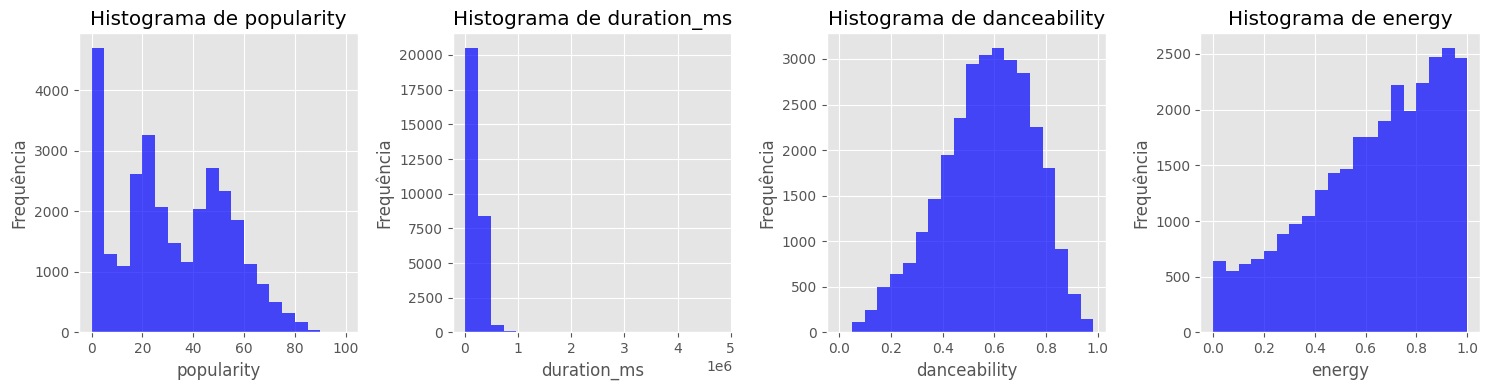

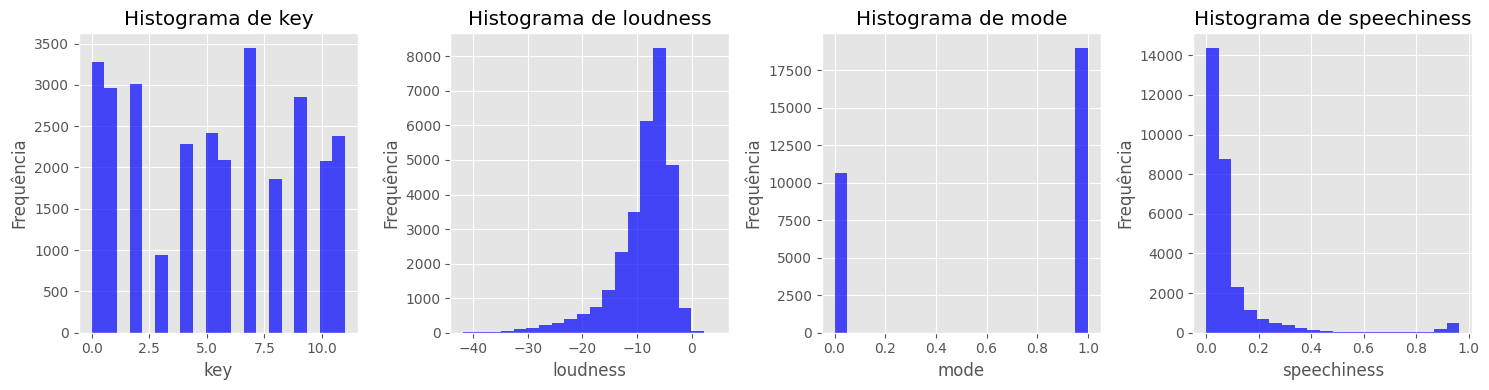

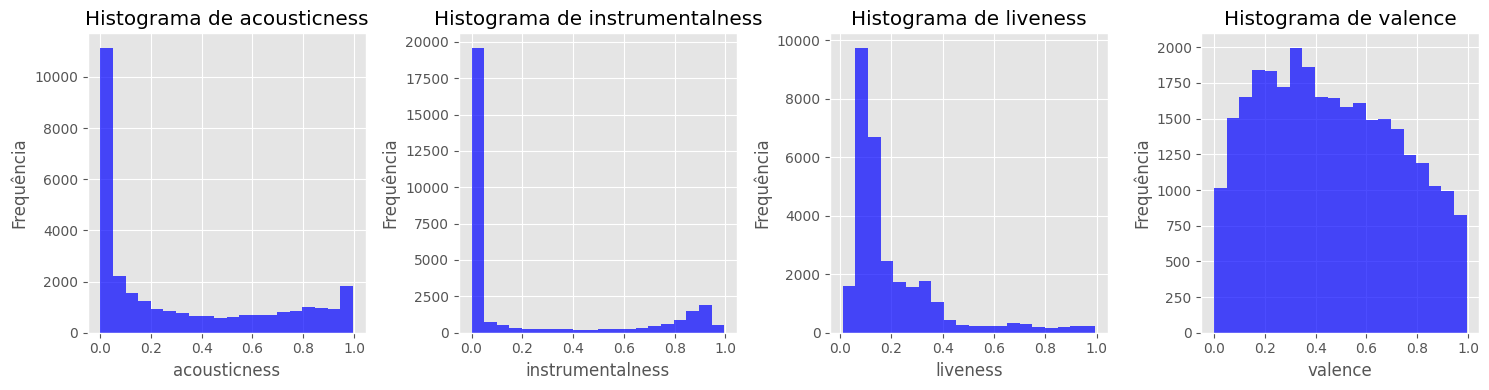

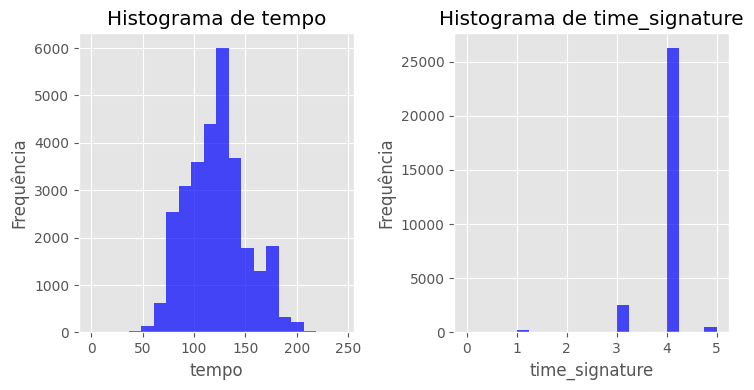

In [ ]:
variaveis_qnt = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
             'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
             'valence', 'tempo', 'time_signature']

# plot de histograma das variáveis quantitativas da base

num_variaveis_por_linha = 4  # Número de variáveis por linha
num_linhas = math.ceil(len(variaveis_qnt) / num_variaveis_por_linha)

for linha in range(num_linhas):
    plt.figure(figsize=(15, 4))  # Ajuste o tamanho aqui
    for coluna in range(num_variaveis_por_linha):
        indice = linha * num_variaveis_por_linha + coluna
        if indice < len(variaveis_qnt):
            variavel = variaveis_qnt[indice]
            plt.subplot(1, num_variaveis_por_linha, coluna + 1)
            plt.hist(df[variavel], bins=20, color='blue', alpha=0.7)
            plt.title(f'Histograma de {variavel}')
            plt.xlabel(variavel)
            plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

Após a plotagem dos histogramas das variáveis quantitativas,pode-se constatar que:

*   maioria das músicas do dataset, tiveram um indice de popularidade < 20;
*   faixas dançantes são distribuidas de maneira equilibrada no dataset;
*   nota-se a presença de outliers nos histogramas de 'speechiness', 'acousticness' e 'instrumentalness';
*   características 'key', 'mode' e 'time_signature' são categorizadas.



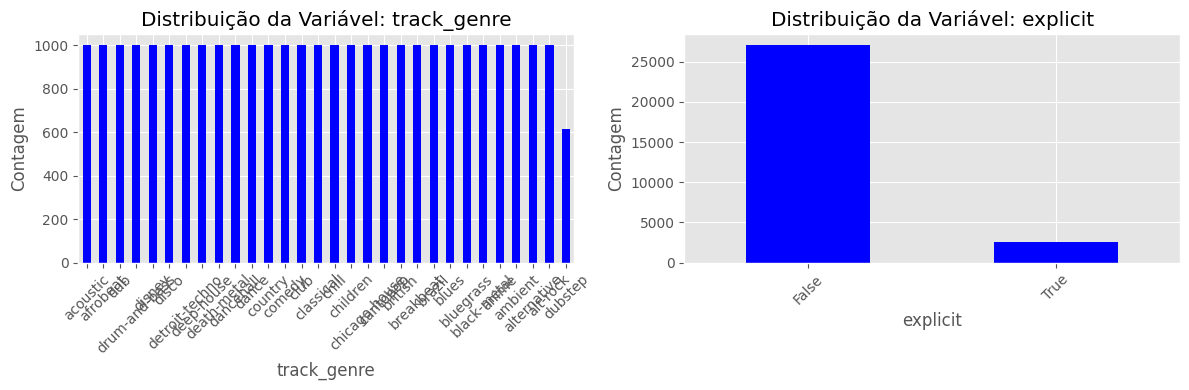

In [ ]:
variaveis_objects = ['track_genre', 'explicit']


fig, axes = plt.subplots(1, len(variaveis_objects), figsize=(12, 4))  # Define o número de subplots e o tamanho da figura

for i, variavel in enumerate(variaveis_objects):
    contagem_por_categoria = df[variavel].value_counts()
    ax = axes[i]  # Seleciona o subplot atual
    contagem_por_categoria.plot(kind='bar', color='blue', ax=ax)
    ax.set_title(f'Distribuição da Variável: {variavel}')
    ax.set_xlabel(variavel)
    ax.set_ylabel('Contagem')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Para ajustar os espaços entre os subplots
plt.show()

Quanto aos dados qualitativos, podemos observar que:


*   base está bem distribuida quanto aos gêneros musicais, dos 30 presentes, apenas 1 é possui uma presença pequena em relação aos demais;
*   a grande maioria das músicas não possuem letras explícitas.



In [ ]:
#melhor visualização dos gêneros musicais presentes
pd.set_option('display.max_rows', None)

# Contar os valores únicos da coluna 'track_genre'
contagem_por_genero = df['track_genre'].value_counts()

# Exibir os valores contados
print(contagem_por_genero)

# Restaurar a configuração padrão de exibição máxima de linhas
pd.reset_option('display.max_rows')

acoustic          1000
afrobeat          1000
dub               1000
drum-and-bass     1000
disney            1000
disco             1000
detroit-techno    1000
deep-house        1000
death-metal       1000
dancehall         1000
dance             1000
country           1000
comedy            1000
club              1000
classical         1000
chill             1000
children          1000
chicago-house     1000
cantopop          1000
british           1000
breakbeat         1000
brazil            1000
blues             1000
bluegrass         1000
black-metal       1000
anime             1000
ambient           1000
alternative       1000
alt-rock          1000
dubstep            615
Name: track_genre, dtype: int64


In [ ]:
df['explicit'].value_counts()

False    27058
True      2557
Name: explicit, dtype: int64

In [ ]:
# visualização dos artitas mais presentes e menos presentes no dataset
df['artists'].value_counts()

my little airport            171
Glee Cast                    139
The Beatles                  127
CoComelon                    122
Ella Fitzgerald              112
                            ... 
Rufi-O;Lily Potter             1
Fatboibari;Shiloh              1
Kid Travis;Eluzai              1
Pink Sweat$;Patrickananda      1
Dabin;Lexi Norton              1
Name: artists, Length: 10149, dtype: int64

### 1.4 Análise Multivariável

Além disso, na análise multivariada, buscamos identificar padrões, associações e tendências que surgem quando várias variáveis são examinadas em conjunto, ao considerar as relações simultâneas entre diferentes dimensões dos dados. Dessa forma, buscamos encontrar essas relações a partir da análise do mapa de calor com seus valores e o percentual desses dados.

<ipython-input-26-516c61347e62>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df[musica].corr()


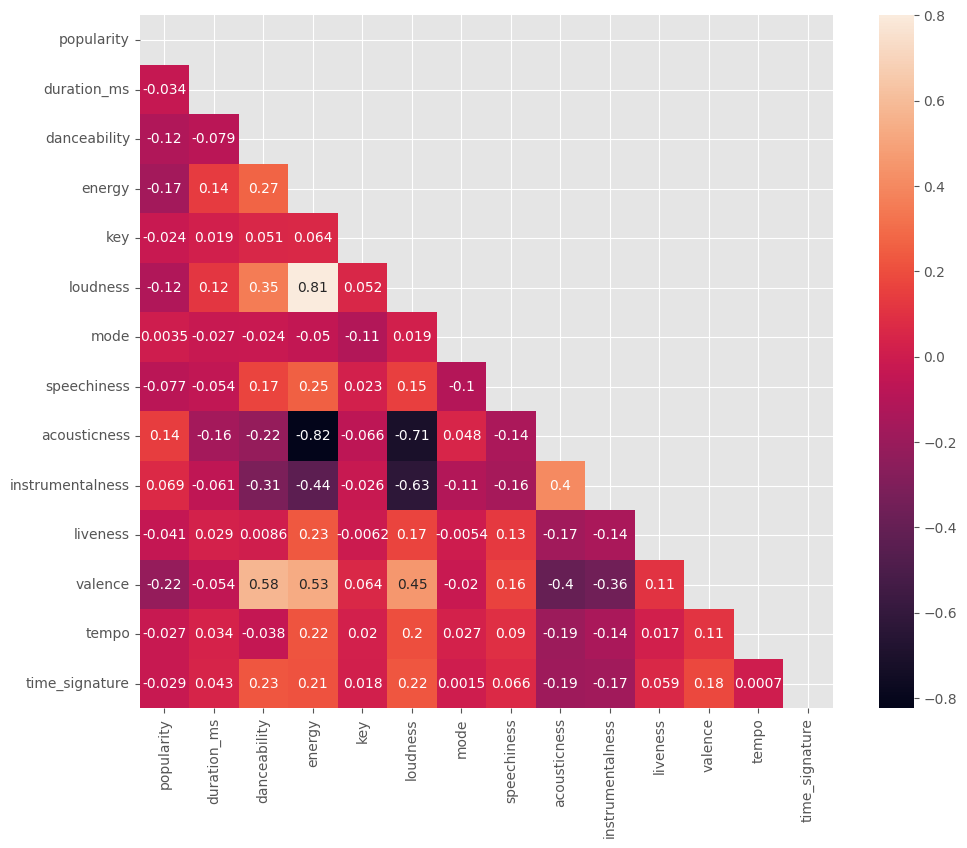

In [ ]:
# Mapa de Calor
musica = ['popularity', 'duration_ms', 'danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
             'acousticness', 'instrumentalness','liveness', 'valence', 'tempo','time_signature','track_genre']

# matriz de correlação
corrmat = df[musica].corr()

#configurações do tamanho do plot
fig = plt.figure(figsize = (12, 9))

#masking the upper traingle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sb.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

<ipython-input-27-767afc3cf76e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df[musica].corr()


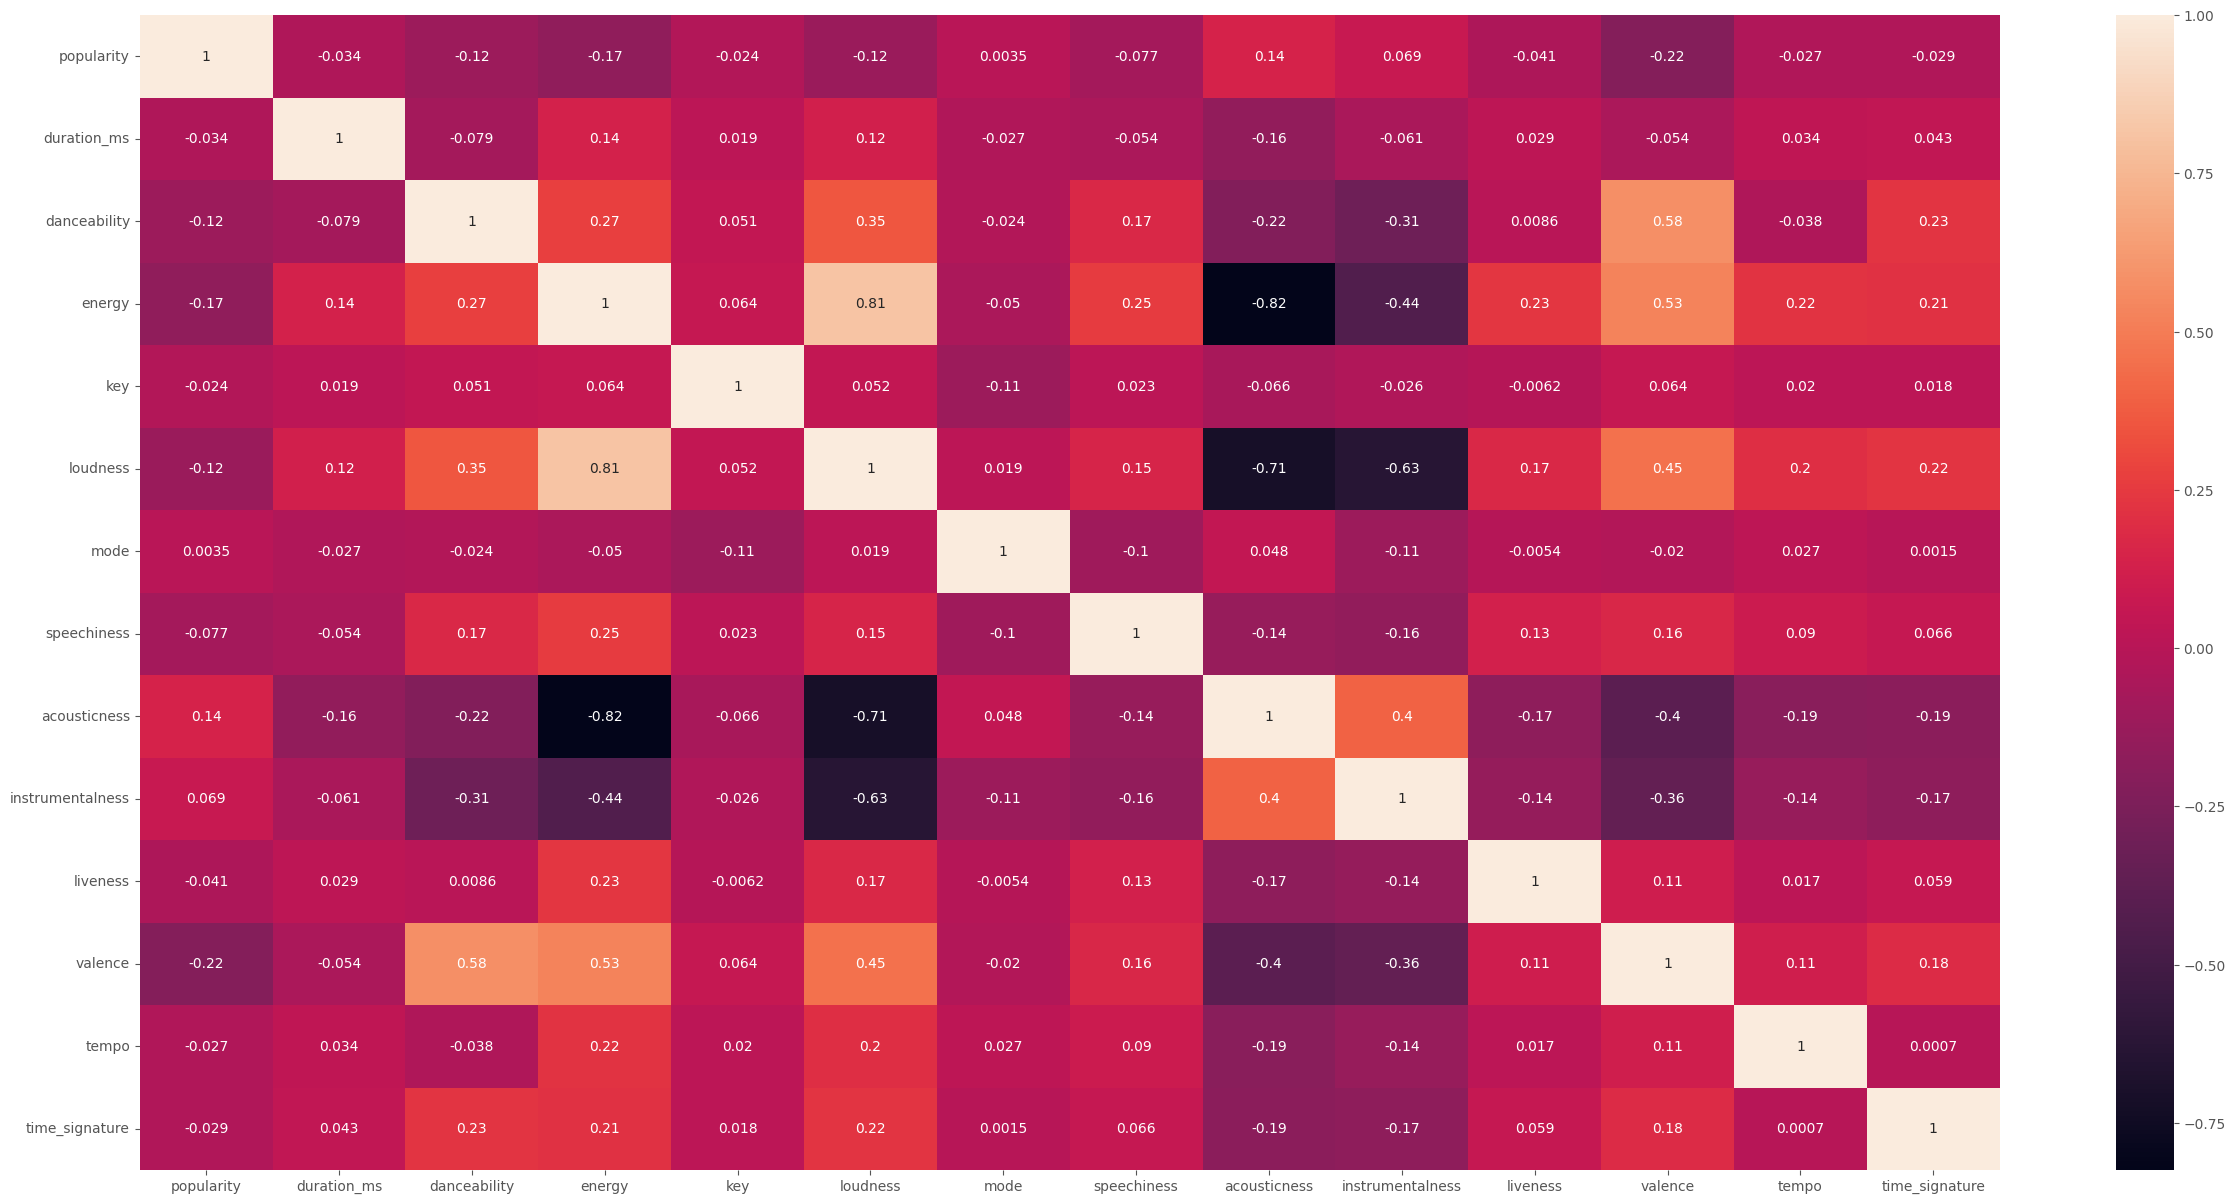

In [ ]:
# Exploração percentual desses valores
plt.figure(figsize=(30,15))
musica = ['popularity', 'duration_ms', 'danceability','energy', 'key', 'loudness', 'mode', 'speechiness',
             'acousticness', 'instrumentalness','liveness', 'valence', 'tempo','time_signature','track_genre']
corrMatrix = df[musica].corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

logo, percebe-se que:


*   existe correlação negativa entre variáveis;
*   a correlação negativa e predominante;
*   'valence' possui uma média melhor de correlações positivas;
*   a maior correlação ocorre entre 'loudness' e 'energy'.



## 2. Resultados


Esta seção terá como objetivo fornecer um resumo abrangente das hipóteses iniciais propostas no estudo, bem como apresentar as conclusões e insights obtidos por meio da análise dos dados.

2.1 - Qual a relação das variáveis com o nível de popularidade da faixa?


Como observado na seção 1.4, o mapa de calor forma uma matriz de correlação entre as variáveis quantitativas. Assim, valores próximos a 1 indicam uma correlação positiva forte, valores próximos a -1 indicam uma correlação negativa forte e valores próximos a 0 indicam pouca ou nenhuma correlação. Portanto, infere-se que essas características possuem pouca relação na influência da popularidade da faixa, devido à grande presença de valores >= 0.


Essa análise permite afirmar que é necessário buscar outras características que se relacionem de maneira mais significativa com a variável de popularidade. Vale ressaltar que o dataset contou apenas com dados das características da faixa e não do artista.

2.2 - Faixas gravadas ao vivo são mais dançantes?


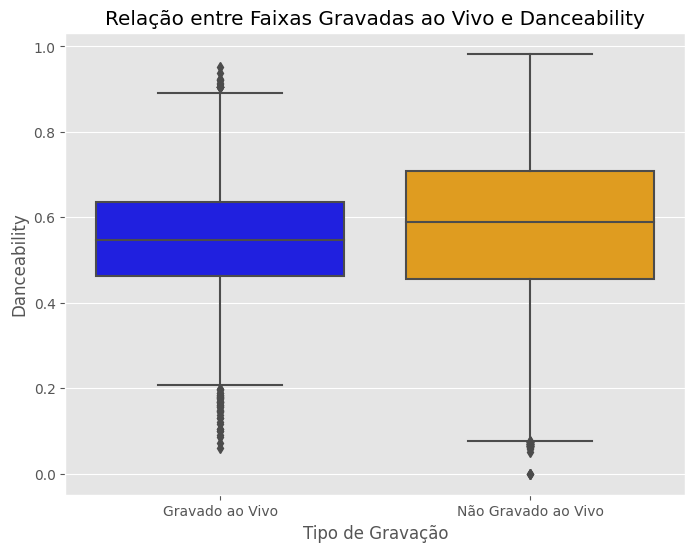

In [ ]:
# Filtrar as faixas gravadas ao vivo e não gravadas ao vivo
live_tracks = df[df['liveness'] > 0.5]
non_live_tracks = df[df['liveness'] <= 0.5]

# Criar um boxplot comparando liveness e danceability
plt.figure(figsize=(8, 6))
sb.boxplot(data=[live_tracks['danceability'], non_live_tracks['danceability']], palette=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Gravado ao Vivo', 'Não Gravado ao Vivo'])
plt.title('Relação entre Faixas Gravadas ao Vivo e Danceability')
plt.xlabel('Tipo de Gravação')
plt.ylabel('Danceability')
plt.show()

Primeiro, foram filtradas as faixas que poderiam ter a presença de audiência em sua gravação, e em seguida, a relação entre esses dois grupos foi plotada utilizando um boxplot. A partir da análise do boxplot, é possível perceber que os índices de dançabilidade das faixas são maiores quando não há interferência de gravação ao vivo. Isso sugere que as faixas gravadas em estúdio ou sem a participação de uma audiência tendem a ter maior dançabilidade em comparação com as faixas gravadas ao vivo.

2.3 - As faixas com letras explícitas tendem a ser mais populares?

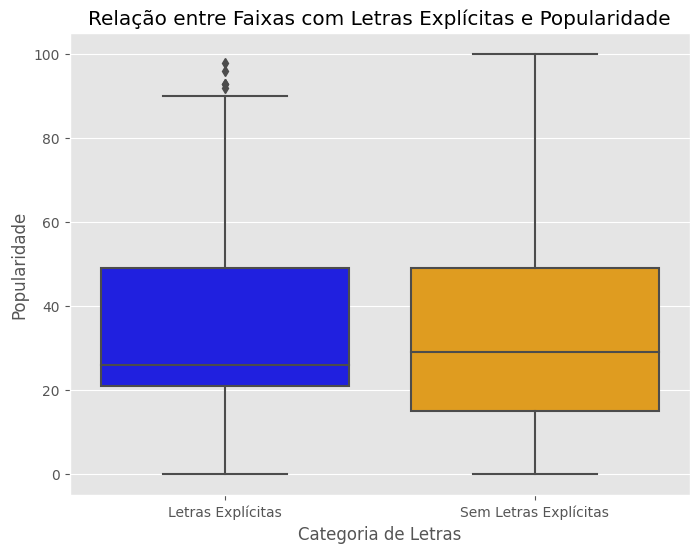

In [ ]:
# Filtrar as faixas com letras explícitas e sem letras explícitas
explicit_tracks = df[df['explicit'] == True]
non_explicit_tracks = df[df['explicit'] == False]

# Criar um boxplot comparando a popularidade das duas categorias
plt.figure(figsize=(8, 6))
sb.boxplot(data=[explicit_tracks['popularity'], non_explicit_tracks['popularity']], palette=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Letras Explícitas', 'Sem Letras Explícitas'])
plt.title('Relação entre Faixas com Letras Explícitas e Popularidade')
plt.xlabel('Categoria de Letras')
plt.ylabel('Popularidade')
plt.show()

A plotagem do boxplot permite relacionar essas duas variáveis. Assim, é possível observar que a mediana da popularidade em faixas sem letras explícitas é maior, indicando uma tendência maior de popularidade em relação às faixas com letras explícitas. No entanto, é importante ressaltar que o dataset analisado apresenta um quantitativo muito maior de faixas sem letras explícitas, o que pode gerar vieses para a análise.